# Project: Star Wars detection adventure

## Introduction

In this project, we will work on the dataset [star wars survey](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey) which was collected by the team at FiveThirtyEight before the release of `Star Wars: The Force Awakens` to answer their question:**Does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**

The data is collected by running a poll through SurveyMonkey Audience, surveying 1,186 respondents from June 3 to 6 in 2014.
I will clean this data and use it to answer some questions like: Is Star Wars really popular as I thought? Which gender prefers to watch it? Which episode is a real breadwinner? Who is the most impressive character and who is the most favorite? Identify the pattern of Star Wars customers and so on.

#### Summary of results

After interpretations, I will sum up some interesting points as follows:

Star Wars audiences are about 3 times more than who is not. Men shows more interest in Star Wars than women but both genders like  Episode V The Empire Strikes Back most. The audience of Star Wars are of the age of 30-60, so they have graduated from high school, with the household income between `$ 50,000 - $ 99,999`.The 3 biggest markets of Star Wars include Pacific, East North Central and South Atlantic. About the character:Luke Skywalker is the most impressive but Han Solo is the most favorite.

For more details, please refer to the full analysis below.

## Read data and initial observations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100) 
star_wars = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/star-wars-survey/StarWars.csv',encoding="ISO-8859-1")#read data from github repository, we use encoding="ISO-8859-1" because there are some special characters in this file 
# star_wars.to_csv('star_wars_original.csv') #save a dataset in a local pc
star_wars.shape

(1187, 38)

The dataset contains 1186 rows and 38 columns.

In [2]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   float64
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1187 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          837 non-null    object 
 3   Which of the following Star 

## Data cleaning

### Merge and reform column names

Besides some self-explanatory columns, it is clear that the other such as columns[4:9] have been encoded, let's print first 5 rows to have a more transparent look of data.

In [3]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


As we can see,the first rows has no `RespondentID` and the information that has been encoded are added in this row. So our work is to map the header with the first row to have 1 row as readable header. To simplify our columns, we will do as follows:
- Simplify all columns with long names
- Rename the columns about the episode the respondent has seen with the form: `seen_{number of episode seen}`
- Rename the columns about respondent's preferable episode as `prefer_{number of preferable episode}`
- Rename all the columns about the ranking of beloved characters with that character's name
- Manipulate the rest of column names so that they have the consistent format with the others.

In [4]:
# Simplify long column names
column_dict = {
                'RespondentID':'id',
                'Do you consider yourself to be a fan of the Star Wars film franchise?':'starwars_fan',
                'Have you seen any of the 6 films in the Star Wars franchise?':'have_seen_sw_films',
                'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1',
                'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'prefer_1',
                'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.':'han_solo',
                'Which character shot first?':'character_shot_first',
                'Are you familiar with the Expanded Universe?':'know_expanded_universe',
                'Do you consider yourself to be a fan of the Expanded Universe?æ':'expanded_universe_fan',
                'Do you consider yourself to be a fan of the Star Trek franchise?':'star_trek_fan',
                'Location (Census Region)':'Location'
            }
star_wars= star_wars.rename(columns=column_dict)

# Create a dictionary of columns names need to be cleaned from 2 tuples
old_column_names = star_wars.loc[:,'Unnamed: 4':'Unnamed: 8'].columns
new_column_names = ['seen_{}'.format(i) for i in range(2,7)]
col_dict = dict(zip(old_column_names,new_column_names))

# Rename a slice of columns
star_wars.rename(columns=col_dict,inplace=True)
star_wars.columns

Index(['id', 'have_seen_sw_films', 'starwars_fan', 'seen_1', 'seen_2',
       'seen_3', 'seen_4', 'seen_5', 'seen_6', 'prefer_1', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'han_solo',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'character_shot_first', 'know_expanded_universe',
       'expanded_universe_fan', 'star_trek_fan', 'Gender', 'Age',
       'Household Income', 'Education', 'Location'],
      dtype='object')

It's not enought there are still 13 columns of beloved characters being encoded. Let's rename them with the corresponding character's name.

In [5]:
# Rename columns about beloved character
actors_columns = dict(zip(star_wars.loc[:,'Unnamed: 16':'Unnamed: 28'].columns,
         star_wars.loc[0,'Unnamed: 16':'Unnamed: 28'].str.lower().str.replace(' ','_')
        ))
star_wars.rename(columns=actors_columns,inplace=True)

# Rename columns about preferable episodes
preferable_episode = dict(zip(star_wars.loc[:,'Unnamed: 10':'Unnamed: 14'].columns,['prefer_{}'.format(i) for i in range(2,7)]))
star_wars.rename(columns = preferable_episode,inplace=True)

Now we will rename the rest of the column names so that their names are in consistent form and we will drop the 1st row of our dataset.

In [6]:
# Create the format consistence in all column names, drop the first row
star_wars.columns = star_wars.columns.str.lower().str.replace(' ','_')
star_wars = star_wars.iloc[1:,:].copy()

star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 1 to 1186
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1186 non-null   float64
 1   have_seen_sw_films      1186 non-null   object 
 2   starwars_fan            836 non-null    object 
 3   seen_1                  673 non-null    object 
 4   seen_2                  571 non-null    object 
 5   seen_3                  550 non-null    object 
 6   seen_4                  607 non-null    object 
 7   seen_5                  758 non-null    object 
 8   seen_6                  738 non-null    object 
 9   prefer_1                835 non-null    object 
 10  prefer_2                836 non-null    object 
 11  prefer_3                835 non-null    object 
 12  prefer_4                836 non-null    object 
 13  prefer_5                836 non-null    object 
 14  prefer_6                836 non-null    

### Rows cleaning

As we can see from the table above, except for the `id` column, all others have the data type **object** which indicates that the information is recorded as string. To make them more informative and easier to analyse we will transform them to the right data type based on their meaning.

#### Cleaning and mapping Yes/No columns to Boolean datatype

Printing some very first rows of dataset above, we realise that 5 columns:

- `have_seen_sw_films` answers question *Have you seen any of the 6 films in the Star Wars franchise?*
- `starwars_fan` answers question *Do you consider yourself to be a fan of the Star Wars film franchise?*
- `know_expanded_universe` answers the question *Are you familiar with the Expanded Universe?*
- `expanded_universe_fan`  answers question *Do you consider yourself to be a fan of the Expanded Universe?*
- `star_trek_fan` answers question *Do you consider yourself to be a fan of the Star Trek franchise?*

All represent Yes/No questions. They can also be NaN where a respondent chooses not to answer a question. We can use the pandas.Series.value_counts() method on a series to see all of the unique values in a column, along with the total number of times each value appears.

In [7]:
star_wars['have_seen_sw_films'].value_counts(dropna=False)

Yes    936
No     250
Name: have_seen_sw_films, dtype: int64

In [8]:
star_wars['starwars_fan'].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: starwars_fan, dtype: int64

Our hypothesis has been confirmed, now we will perform the conversion of data into boolean type with only the values True, False, and NaN.

In [9]:
boolean_map = {"Yes": True,
               "No": False}
for column in ['have_seen_sw_films','starwars_fan','know_expanded_universe','expanded_universe_fan','star_trek_fan']:    
    star_wars[column] = star_wars[column].map(boolean_map,na_action='ignore')

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, *Which of the following Star Wars films have you seen? Please select all that apply.* From the output of star_wars.info(), we can guess that there is 2 types of data here string which seems to be the name of the episode and np.nan. So let's verify via frequency table

In [10]:
star_wars['seen_1'].value_counts(dropna=False)

Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: seen_1, dtype: int64

In [11]:
star_wars['seen_3'].value_counts(dropna=False)

NaN                                            636
Star Wars: Episode III  Revenge of the Sith    550
Name: seen_3, dtype: int64

In [12]:
# Create a key:value pair meaning "episode_seen: True" in rows, which indicate the respondent has seen this episode
seen_map = {}
# Get the answer form from the 1st respondent, because he/she saw all episodes
for i in star_wars.loc[1,'seen_1':'seen_6']: 
    seen_map[i] = True
# For the rows with Nan values, assume that he/she hasn't seen that episode yet
seen_map[np.nan] = False

print(seen_map)
# Mapping checkbox columns
for episode in ['seen_{}'.format(i) for i in range(1,7)]:
    star_wars[episode] = star_wars[episode].map(seen_map)

{'Star Wars: Episode I  The Phantom Menace': True, 'Star Wars: Episode II  Attack of the Clones': True, 'Star Wars: Episode III  Revenge of the Sith': True, 'Star Wars: Episode IV  A New Hope': True, 'Star Wars: Episode V The Empire Strikes Back': True, 'Star Wars: Episode VI Return of the Jedi': True, nan: False}


#### Cleaning ranking columns

Looking at the next 6 columns, these ask the respondent to rank the Star Wars movies in order from least to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN.

Fortunately, these columns don't require much cleaning. We'll need to convert each column to a numeric type only.

In [13]:
# Convert ranking columns to numeric
star_wars.loc[:,'prefer_1':'prefer_6']=star_wars.loc[:,'prefer_1':'prefer_6'].astype(float) #pandas.to_numeric() use to convert series, we have to use type "float" because there exist nan value (using 'int32') will return errors
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 1 to 1186
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1186 non-null   float64
 1   have_seen_sw_films      1186 non-null   bool   
 2   starwars_fan            836 non-null    object 
 3   seen_1                  1186 non-null   bool   
 4   seen_2                  1186 non-null   bool   
 5   seen_3                  1186 non-null   bool   
 6   seen_4                  1186 non-null   bool   
 7   seen_5                  1186 non-null   bool   
 8   seen_6                  1186 non-null   bool   
 9   prefer_1                835 non-null    float64
 10  prefer_2                836 non-null    float64
 11  prefer_3                835 non-null    float64
 12  prefer_4                836 non-null    float64
 13  prefer_5                836 non-null    float64
 14  prefer_6                836 non-null    

The next 14 columns are also the ranking columns, which answer the question *Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her*. This time the answers,however, are not numeric. Let's see the unique values of these columns.

In [14]:
char_columns = star_wars.loc[:,'han_solo':'yoda'].columns
char_columns
unique_values = []
for col in char_columns:
    uniques = star_wars[col].unique()
    for i in uniques:
        if i not in unique_values:
            unique_values.append(i)

unique_values

['Very favorably',
 nan,
 'Somewhat favorably',
 'Neither favorably nor unfavorably (neutral)',
 'Somewhat unfavorably',
 'Unfamiliar (N/A)',
 'Very unfavorably']

The information is somehow self-explanatory, we will keep 'Unfamiliar (N/A)' as they are, and categorize other marks as follows:
+ 'Very favorably': 1
+ 'Somewhat favorably': 2
+ 'Neither favorably nor unfavorably (neutral)': 3
+ 'Somewhat unfavorably': 4
+ 'Very unfavorably': 5

In [15]:
char_dict = {'Very favorably': 1,
             'Somewhat favorably': 2,
             'Neither favorably nor unfavorably (neutral)': 3,
             'Somewhat unfavorably': 4,
             'Very unfavorably': 5,
             'Unfamiliar (N/A)':'Unfamiliar (N/A)'}
for col in char_columns:
    star_wars[col] = star_wars[col].map(char_dict)

## Data analysis 
### Dealing with missing data

Before we get started to detect any pattern, let's have a look at our missing data visualization.

<AxesSubplot:>

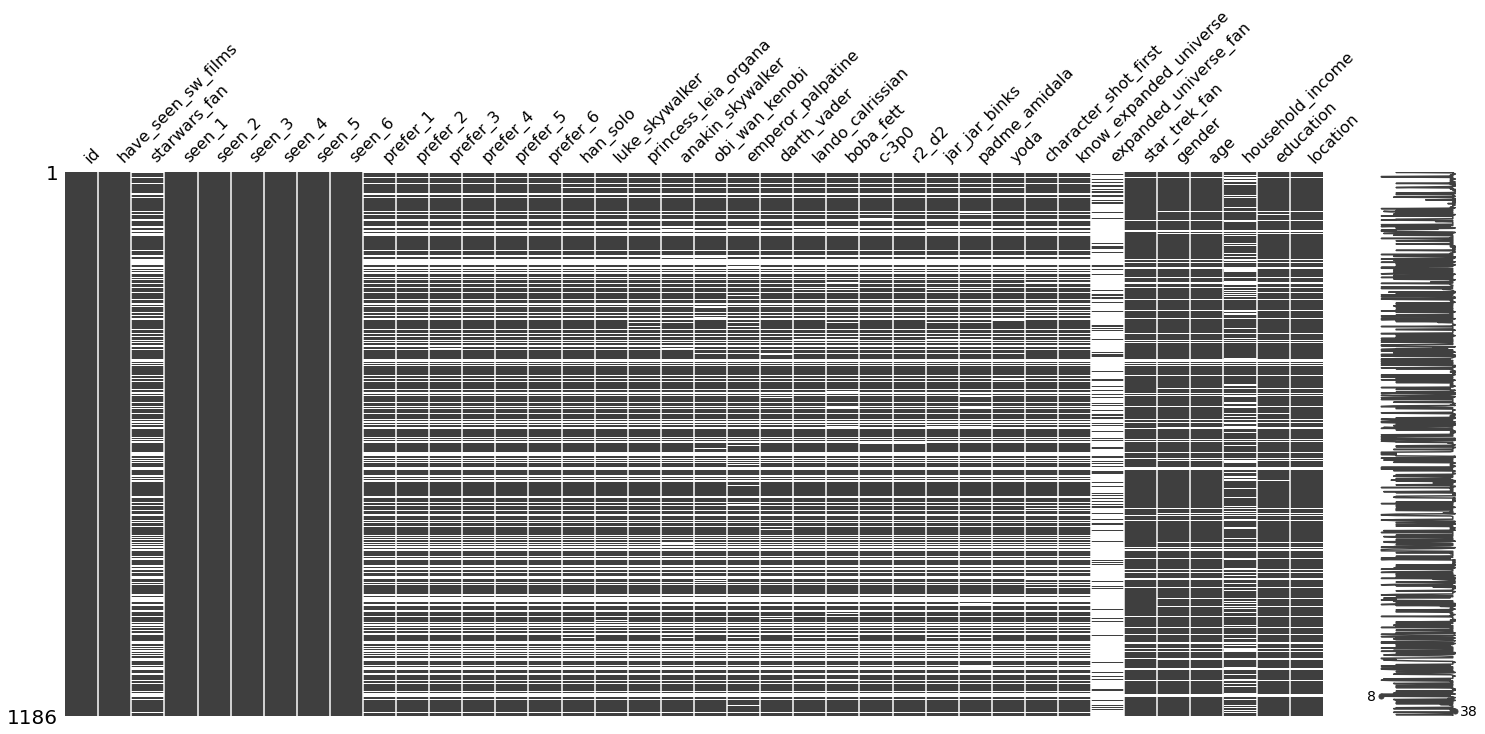

In [16]:
import missingno as msno
msno.matrix(star_wars)

It is interesting that the column `have_seen_sw_films` which contains the answers for the question *Have you seen any of the 6 films in the Star Wars franchise?* has no missing data. If that is true, then we can define some legitimate missing data of other columns. For example, if that respondent hasn't seen any episode of Star Wars, then it is very likely that he will pass other questions too. So it's better to verify the unique value of this column and then based on that to look at the respondents who haven't seen any episode.

In [17]:
star_wars['have_seen_sw_films'].value_counts(dropna=False)

True     936
False    250
Name: have_seen_sw_films, dtype: int64

So eveybody joining the survey answered this question. We will subset the people saying they had never seen Star wars and look at the missing pattern again.

Number of not seen respondents:  250
Number of seen respondents:  936


<AxesSubplot:>

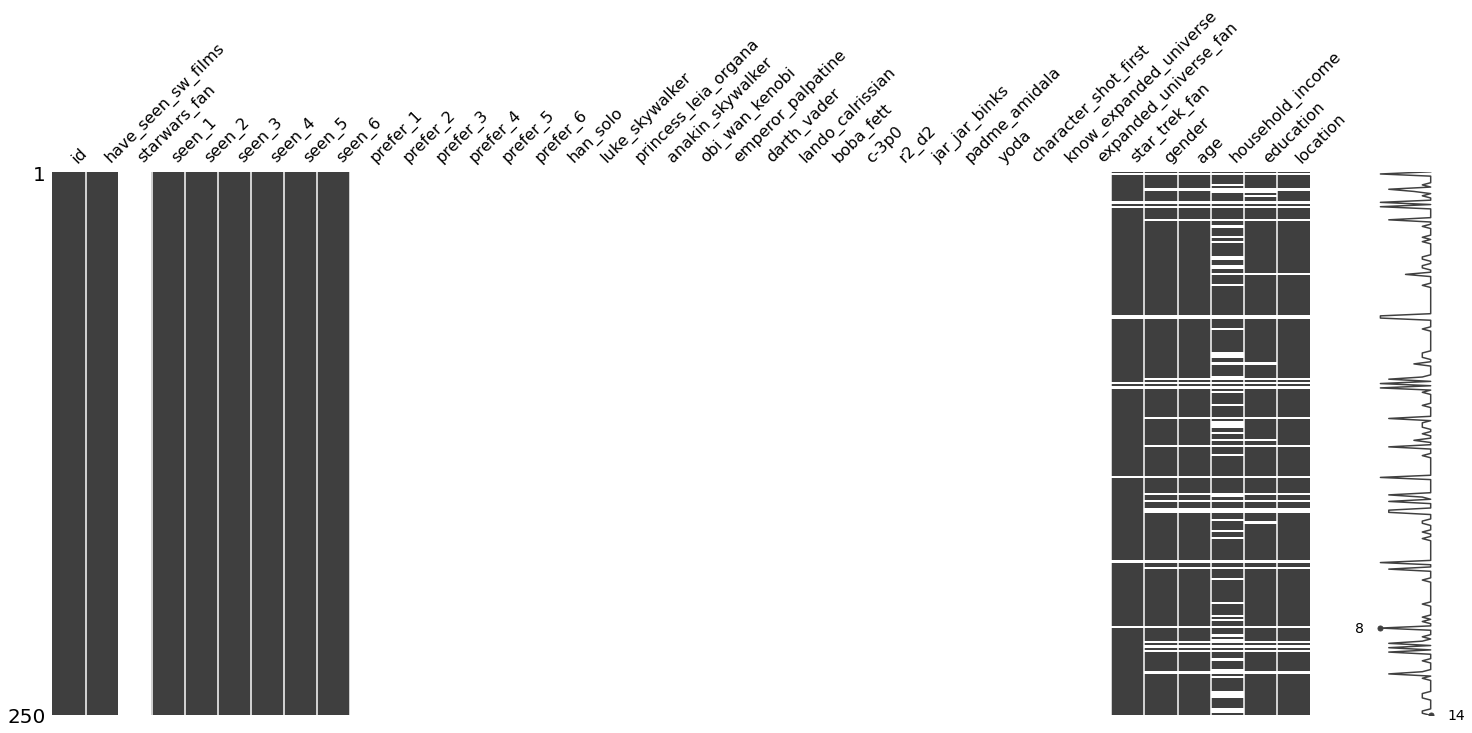

In [18]:
# Group people haven't seen Star Wars yet
not_seen = star_wars[star_wars['have_seen_sw_films']==False]
print('Number of not seen respondents: ',not_seen.shape[0])
seen = star_wars[star_wars['have_seen_sw_films']==True]
print('Number of seen respondents: ',seen.shape[0])

#Visualize missing data
msno.matrix(not_seen)

In [19]:
not_seen.head()

,id,have_seen_sw_films,starwars_fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,prefer_1,prefer_2,prefer_3,prefer_4,prefer_5,prefer_6,han_solo,luke_skywalker,princess_leia_organa,anakin_skywalker,obi_wan_kenobi,emperor_palpatine,darth_vader,lando_calrissian,boba_fett,c-3p0,r2_d2,jar_jar_binks,padme_amidala,yoda,character_shot_first,know_expanded_universe,expanded_universe_fan,star_trek_fan,gender,age,household_income,education,location
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
12,3.292635e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,3.292448e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",High school degree,East South Central
35,3.292298e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Male,30-44,"$50,000 - $99,999",Graduate degree,East South Central
47,3.292202e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Male,18-29,"$0 - $24,999",High school degree,Pacific


As we can see, because they haven't seen Star Wars so it is reasonable they will not rank neither the film nor the characters. These are *Missing not at random* (MNAR) data and to have an unbiased results, we will now leave these as they are and we have created 2 subsets: `not_seen` including people not seen any Star Wars episode and `seen` indicating that person has seen at least 1 episode of Star Wars.

<AxesSubplot:>

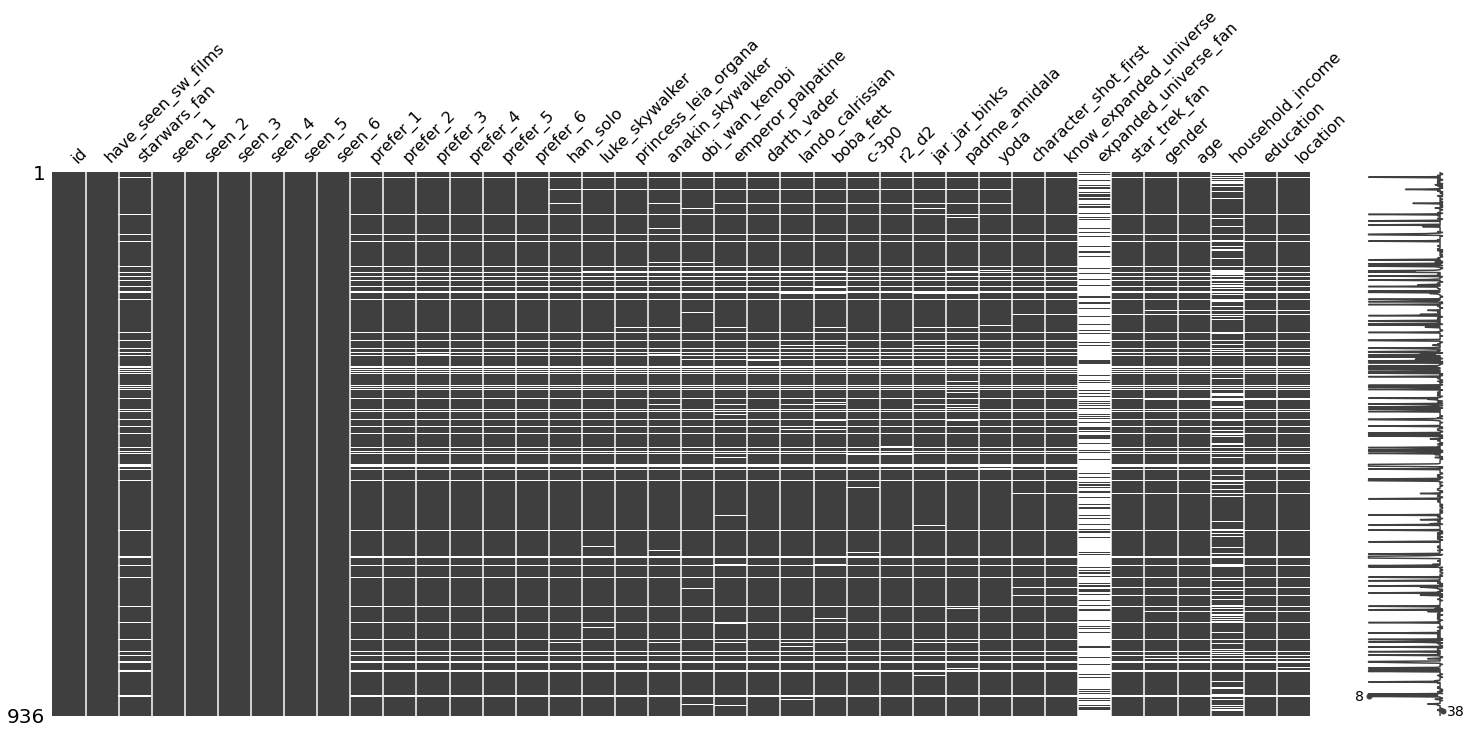

In [20]:
msno.matrix(seen)

Looking at the missing patter, we see something strange here. These people said that they saw Star Wars but some of them passed most of the other columns. Let's look at a group of respondents who refused to answer whether they are Star Wars fan firstly.

In [21]:
seen[seen['starwars_fan'].isnull()]

,id,have_seen_sw_films,starwars_fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,prefer_1,prefer_2,prefer_3,prefer_4,prefer_5,prefer_6,han_solo,luke_skywalker,princess_leia_organa,anakin_skywalker,obi_wan_kenobi,emperor_palpatine,darth_vader,lando_calrissian,boba_fett,c-3p0,r2_d2,jar_jar_binks,padme_amidala,yoda,character_shot_first,know_expanded_universe,expanded_universe_fan,star_trek_fan,gender,age,household_income,education,location
11,3.292638e+09,True,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,3.291669e+09,True,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,3.291570e+09,True,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,3.291470e+09,True,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,3.291420e+09,True,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,3.288551e+09,True,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1109,3.288512e+09,True,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1140,3.288460e+09,True,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1142,3.288459e+09,True,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we can see, it seems that they have provided the wrong answer for the question *Have you seen any of the 6 films in the Star Wars franchise?* because after that when being asked about which episode did they see, all the responses were `False`. So let's replace the value of these people in column `have_seen_sw_films` with `False` and regroup our subsets of data.

In [22]:
star_wars.loc[star_wars['starwars_fan'].isnull(),'have_seen_sw_films'] = False
not_seen = star_wars[star_wars['have_seen_sw_films']==False]
print('Number of not seen respondents: ',not_seen.shape[0])
seen = star_wars[star_wars['have_seen_sw_films']==True]
print('Number of seen respondents: ',seen.shape[0])

Number of not seen respondents:  350
Number of seen respondents:  836


After cleaning, the number of people not seeing Star wars rises from 250 to 350 people. Now let's look at the missing value pattern of seen people again.

<AxesSubplot:>

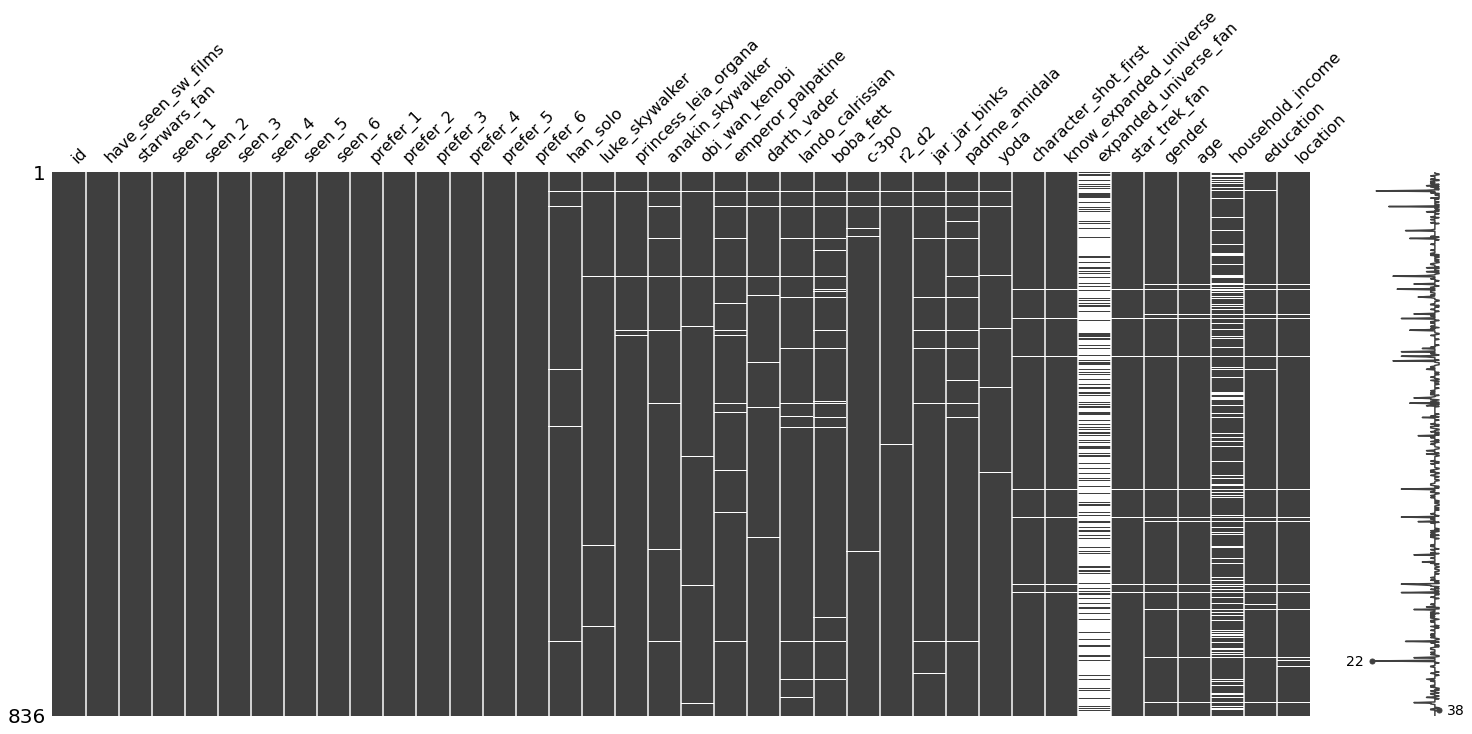

In [23]:
msno.matrix(seen)

### The best episode

Until now our data have been converted to appropriate datatype, cleaned which is easier for us to explore. It's time to dig in and find out some interesting pattern. Let's start from the FiveThirtyEight question: *Does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?*

In [24]:
num_seen = seen.loc[:,'seen_1':'seen_6'].sum().sort_values(ascending=False).reset_index()
num_seen.columns = ['episode_seen', 'num_audiences']
num_seen

,episode_seen,num_audiences
0,seen_5,758
1,seen_6,738
2,seen_1,673
3,seen_4,607
4,seen_2,571
5,seen_3,550


*The best of the bunch* is somehow **fuzzy** here. If we assume that the best film is the one which has the most number of audiences then **“The Empire Strikes Back” is clearly the best of the bunch** with 758 respondents have seen it. But if we consider **the best** based on the customers judgement after seeing it then it is still in question. So now let's define the highest-ranked movie (with the assumption above, **the highest-ranked movie means the episode with the lowest mean ranking**)

In [25]:
mean_rankings = seen[seen.columns[9:15]].mean().sort_values().reset_index()
mean_rankings.columns =['episode','ranking']
mean_rankings 

,episode,ranking
0,prefer_5,2.513158
1,prefer_6,3.047847
2,prefer_4,3.272727
3,prefer_1,3.732934
4,prefer_2,4.087321
5,prefer_3,4.341317


This time we can finally conclude that **Star Wars: Episode V The Empire Strikes Back** is a real blockbuster of Star Wars movies while episode 3 *Star Wars: Episode III Revenge of the Sith* received the worst ranking as well as the smallest number of audiences.

Text(4.8, 3, 'BETTER')

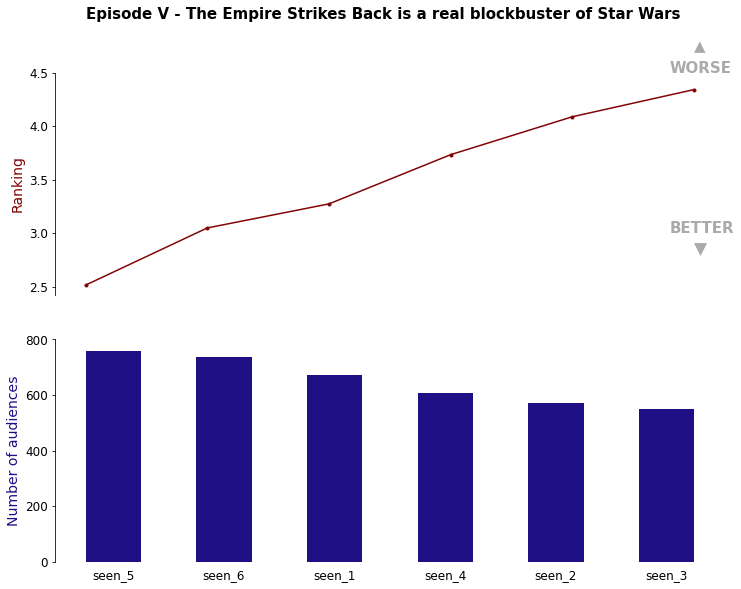

In [26]:
%matplotlib inline
#Create a grid charts using OOP 
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,
                                        figsize=(12,9))
# plot the first graph
ax1.plot(mean_rankings['episode'],mean_rankings['ranking'], marker='.', markersize =6,color='#810303')
ax2.bar(num_seen['episode_seen'],num_seen['num_audiences'],width=0.5,color='#1f0f85')
# Remove spines
for location in ['bottom','top','right']:
    ax1.spines[location].set_visible(False)
    ax2.spines[location].set_visible(False)


# Remove ticks
ax1.tick_params(bottom=False)
ax2.tick_params(bottom=False)
# Remove x-ticks
ax1.set_xticks([])
# Set y-ticks
ax1.set_yticks([2.50,3.00,3.50,4.00,4.50])
ax2.set_yticks([0,200,400,600,800,])

# Set y-axis label
ax1.set_ylabel('Ranking',size=14,color='#810303')
ax2.set_ylabel('Number of audiences',size=14,color='#1f0f85')

# Change the size of x-tick and y-tick labels
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)

ax1.text(0,5,'Episode V - The Empire Strikes Back is a real blockbuster of Star Wars',size = 15, weight ='bold') # add title

ax1.text(5,4.7,'▲',size = 15, weight ='bold',color='#56565a',alpha=0.5) # add symbol
ax1.text(4.8,4.5,'WORSE',size = 15, weight ='bold',color='#56565a',alpha=0.5) # add symbol
ax1.text(5,2.8,'▼',size = 17, weight ='bold',color='#56565a',alpha=0.5) # add symbol
ax1.text(4.8,3,'BETTER',size = 15, weight ='bold',color='#56565a',alpha=0.5) # add symbol

### Exploring the Data by Binary Segments

We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded. There are several columns that segment our data into two groups. We will use `gender` for dividing data.

In [27]:
# plit the data into two groups based on gender column
male = star_wars[star_wars['gender']=='Male']
female = star_wars[star_wars['gender']=='Female']

**Which gender saw Star Wars more?**

In [28]:
male_viewers = male['have_seen_sw_films'].sum()*100.0/male.shape[0]
print('% male: ',round(male_viewers,2))
female_viewers = female['have_seen_sw_films'].sum()*100.0/female.shape[0]
print('% female: ',round(female_viewers,2))

% male:  85.11
% female:  72.31


It is clear that Star Wars is more attractive to men than women. So **which is the most seen episode by gender?**

In [29]:
seen.pivot_table(['seen_{}'.format(i) for i in range(1,7)],'gender')

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
gender,,,,,,
Female,0.750630,0.596977,0.559194,0.642317,0.889169,0.851385
Male,0.853428,0.763593,0.749409,0.808511,0.926714,0.914894


The volume of audience by gender is identical. Here is the order of the most seen episode to the least seen in both gender: episode 5 => episode 6 => episode 1 => episode 4 => episode 2 => episode 3.

But how about their judgement for each episode? **Which one is the most attractive?**

In [30]:
ranking_genders = seen.pivot_table(['prefer_{}'.format(i) for i in range(1,7)],'gender')
ranking_genders

,prefer_1,prefer_2,prefer_3,prefer_4,prefer_5,prefer_6
gender,,,,,,
Female,3.429293,3.954660,4.418136,3.544081,2.569270,3.078086
Male,4.037825,4.224586,4.274882,2.997636,2.458629,3.002364


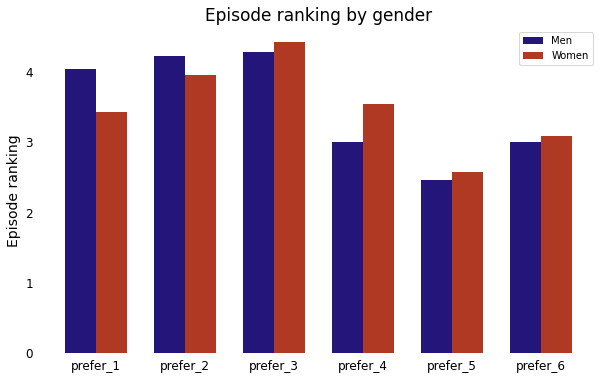

In [31]:
labels = ['prefer_1','prefer_2','prefer_3','prefer_4','prefer_5','prefer_6']
men_ranking = ranking_genders.loc['Male',:]
women_ranking = ranking_genders.loc['Female',:]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width/2, men_ranking, width, label='Men',color='#23157a')
rects2 = ax.bar(x + width/2, women_ranking, width, label='Women',color='#b03924')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Episode ranking',size=14)
ax.set_title('Episode ranking by gender',size=17)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Remove spines
for location in ['bottom','top','right','left']:
    ax.spines[location].set_visible(False)
# Remove ticks
ax.tick_params(bottom=False,left=False)

# Change the size of x-tick and y-tick labels
ax.tick_params(axis='both', labelsize=12)
    
plt.show()

Because of our assumption above, the smaller the number is the more interesting it is to the audience. As a result, episode 5 **The Empire Strikes Back** is voted as the top film by both genders. Another pattern is that even though episode 1 and 2 were watched more by men but women more liked them than men did.

**The Star Wars film franchise vs The Star Trek franchise by gender?** To answer this question we need to convert our data first because both columns `have_seen_sw_films` and `star_trek_fan` have the object type now. As we know, people who haven't seen Star wars legitimately didn't answer this question which is the reason for the missing value here. So we will convert those NaN to False.

In [32]:
star_wars['starwars_fan'].fillna(False,inplace=True)
star_wars['starwars_fan'].value_counts(dropna=False)

False    634
True     552
Name: starwars_fan, dtype: int64

Now let's look at the `star_trek_fan` missing values

<AxesSubplot:>

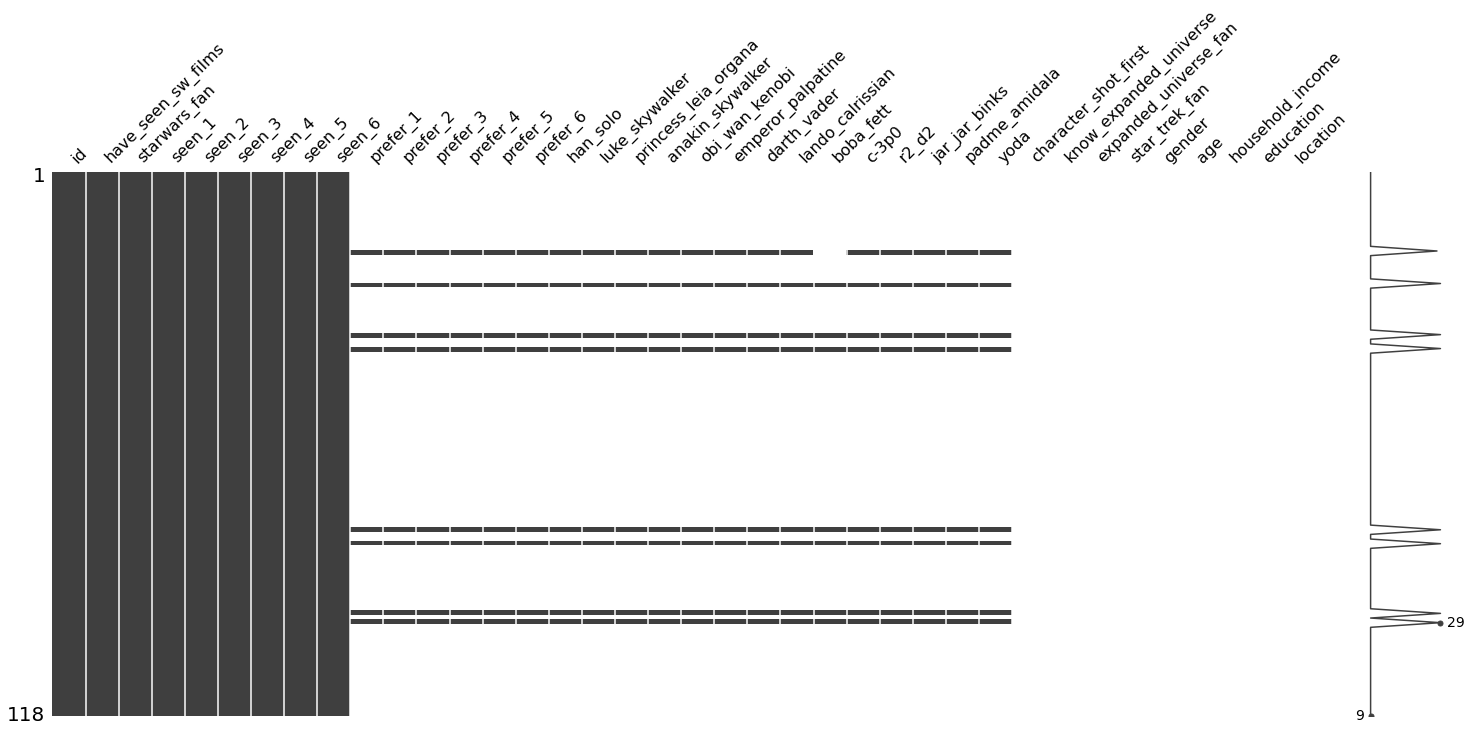

In [33]:
msno.matrix(star_wars.loc[star_wars['star_trek_fan'].isnull(),:])

In [34]:
print(len(star_wars.loc[star_wars['star_trek_fan'].isnull(),:]))
star_wars.loc[star_wars['star_trek_fan'].isnull(),'have_seen_sw_films'].value_counts()

118


False    110
True       8
Name: have_seen_sw_films, dtype: int64

From the incomplete data pattern and the interpretation of `have_seen_sw_films` column, we can guess that 2 reasons for the missing data are that these are the group of people who don't care about fiction movie (they also haven't seen any Star wars episodes) or they are the fans of `starwars_fan` only. So it is appropriate to replace Nan in `star_trek_fan` column with False.

In [35]:
star_wars['star_trek_fan'].fillna(False,inplace=True)
star_wars.pivot_table(['starwars_fan','star_trek_fan'],'gender')

,star_trek_fan,starwars_fan
gender,,
Female,0.340619,0.433515
Male,0.474849,0.609658


Our numbers show that both gender prefer **The Star Wars film franchise** to **The Star Trek franchise**

### Character rankings

Recall that when cleaning the data, we allow our respondents not only to rank their character (from 1 to 5 with the beloved level descending) but also to state 'Unfamiliar (N/A)' if they feel unfamiliar with that character. Let's find out the most familiar and unfamiliar characters to the audience.

In [36]:
# Count the number of audience unfamiliar to each character
unfamiliar_char = {}
for col in seen.loc[:,'han_solo':'yoda'].columns:
    count = 0
    for i in seen[col]:
        if i == 'Unfamiliar (N/A)':
            count +=1
    unfamiliar_char[col] = count

#sort the dictionary
unfamiliar_char = dict(sorted(unfamiliar_char.items(), key=lambda item: item[1], reverse=False))
unfamiliar_char

{'luke_skywalker': 6,
 'princess_leia_organa': 8,
 'darth_vader': 10,
 'r2_d2': 10,
 'yoda': 10,
 'han_solo': 15,
 'c-3p0': 15,
 'obi_wan_kenobi': 17,
 'anakin_skywalker': 52,
 'jar_jar_binks': 109,
 'boba_fett': 132,
 'lando_calrissian': 148,
 'emperor_palpatine': 156,
 'padme_amidala': 164}

Text(0, 15, '160+ respondents are NOT familiar with Padme Amidala')

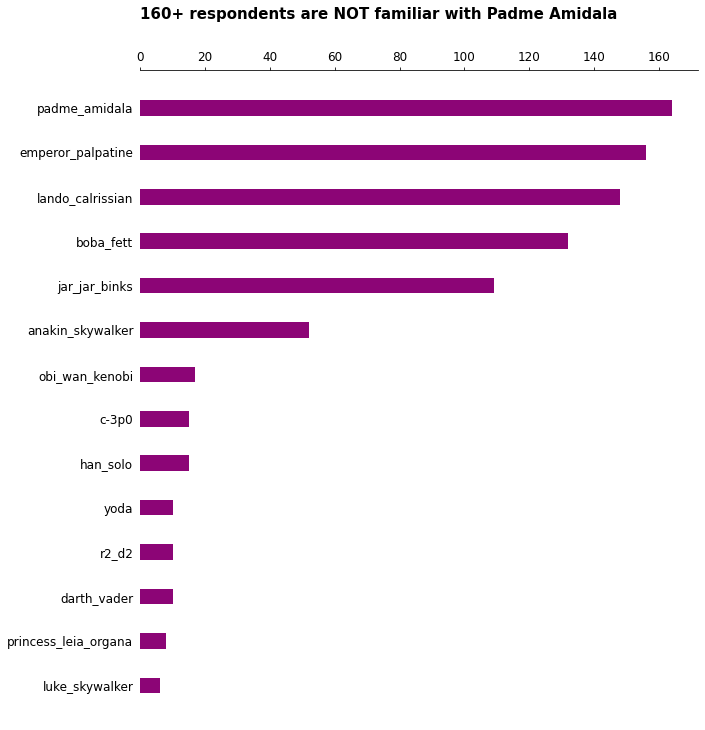

In [37]:
fig,ax = plt.subplots(figsize=(10,12))

# plot a horizontal bar chart from a dictionary
ax.barh(list(unfamiliar_char.keys()),unfamiliar_char.values(), width, color='#8c0576')

# Remove spines
for location in ['bottom','left','right']:
    ax.spines[location].set_visible(False)

# Change the size of x-tick and y-tick labels
ax.tick_params(axis='both',labelsize=12)

# Move the tick labels at the top of the graph
ax.xaxis.tick_top()

# Remove y-tick
ax.tick_params(left = False)

# add title
ax.text(0,15,'160+ respondents are NOT familiar with Padme Amidala',size = 15, weight ='bold') 

The most familiar character is Luke Skywalker and the least one is Padme Amidala.

Now we will discover the respondents view of some Star wars characters. Our questions are:
- Which character do respondents like the most?
- Which character do respondents dislike the most?
- Which character is the most controversial (split between likes and dislikes)?

Before answering these question, we need to convert our data from `object` to `float`.

In [38]:
#convert data type
star_wars.loc[:,'han_solo':'yoda'] = star_wars.loc[:,'han_solo':'yoda'].replace({'Unfamiliar (N/A)':np.nan}) # convert 'Unfamiliar (N/A)' in columns from `han_solo` to `yoda` to NaN
star_wars.loc[:,'han_solo':'yoda'] = star_wars.loc[:,'han_solo':'yoda'].astype(float) # convert other values to numeric type

#calculate the average rank point for each character
character_rankings = star_wars.loc[:,'han_solo':'yoda'].mean().sort_values()
character_rankings

han_solo                1.328010
obi_wan_kenobi          1.367574
yoda                    1.370098
luke_skywalker          1.419394
r2_d2                   1.430488
princess_leia_organa    1.444714
c-3p0                   1.596059
anakin_skywalker        2.224384
lando_calrissian        2.363095
padme_amidala           2.395385
darth_vader             2.520833
boba_fett               2.642647
emperor_palpatine       2.928571
jar_jar_binks           3.219101
dtype: float64

Han Solo is the most highly rated character and Jar Jar blinks are the least. But it's better to see the distribution of rankings

In [39]:
# reshape data frame
melt = pd.melt(star_wars.loc[star_wars['have_seen_sw_films']==True,'han_solo':'yoda'], value_vars=star_wars.loc[star_wars['have_seen_sw_films']==True,'han_solo':'yoda'].columns) # we only consider the audiences of Star Wars, who have seen at least 1 episode.
melt.head()

,variable,value
0,han_solo,1.0
1,han_solo,2.0
2,han_solo,1.0
3,han_solo,1.0
4,han_solo,1.0


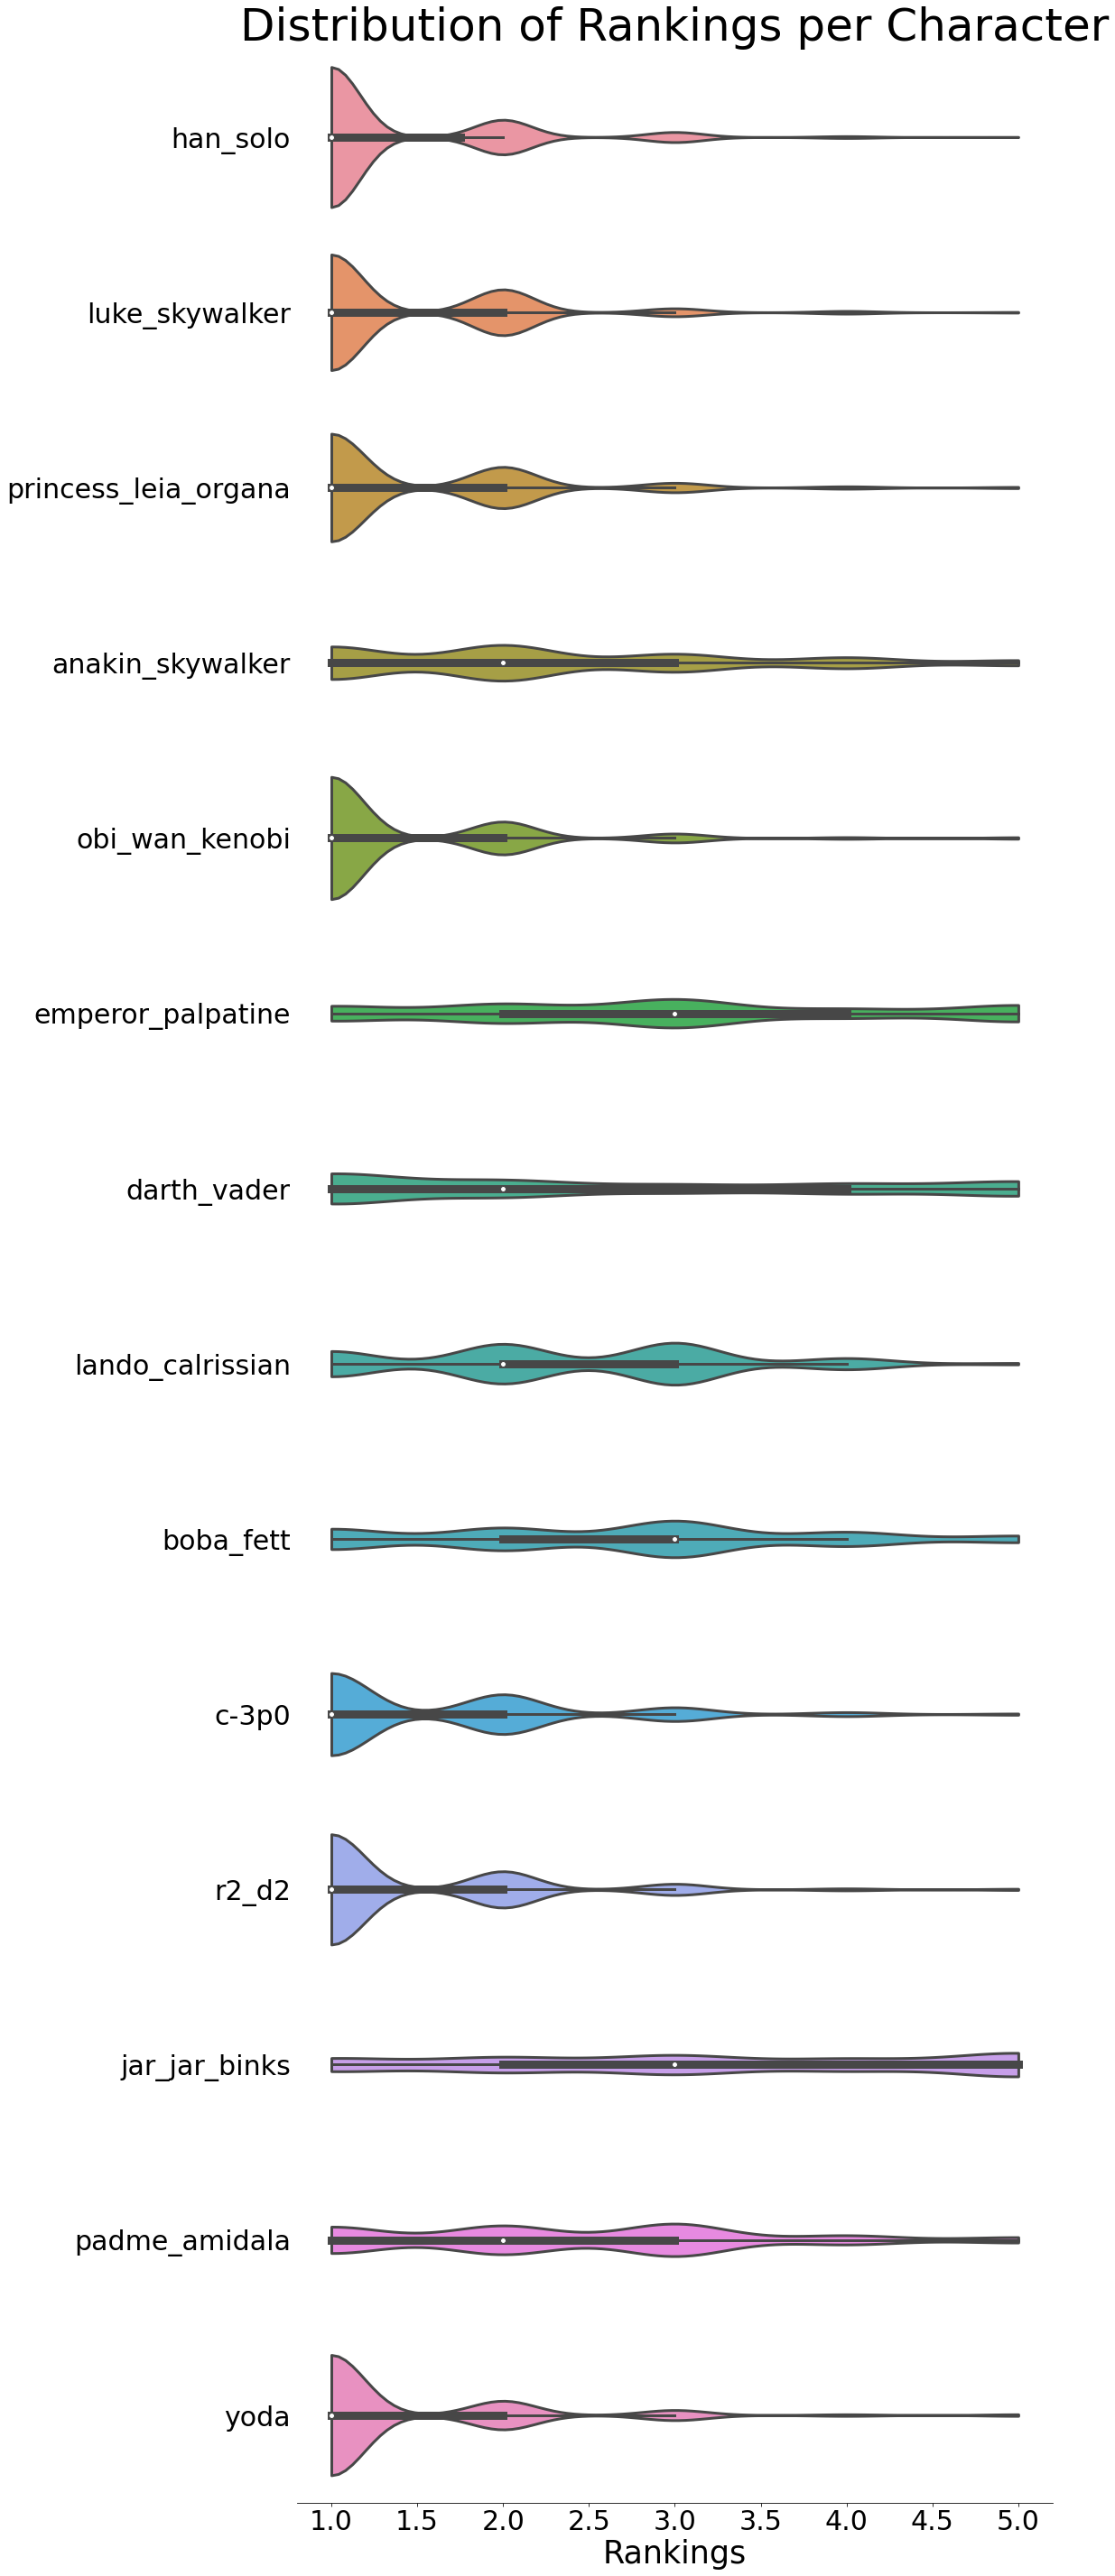

In [40]:

# Creating horizontal violin plots in a truncated form
# (to extend it only to the min and max values of the dataset)
categories = melt['variable']
values = melt['value']
fig, ax = plt.subplots(figsize=(15, 50))
sns.violinplot(y=categories, x=values, linewidth=3, cut=0)
ax.set_title('Distribution of Rankings per Character', fontsize=50)
ax.set_ylabel(None)  
ax.set_xlabel('Rankings', fontsize=35)
ax.tick_params(axis='both', labelsize=30, left = False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

- Han Solo, Obi Wan Kenobi, Yoda, Luke Skywalker, R2-D2, Princess Leia Organa, and C-3P0 are indeed mostly favorite characters, with the majority of respondents marked that they view them very favorably.
- Anakin Skywalker, Padme Amidala, and Lando Calrissian are mostly viewed between favorably and neutrally.
- Boba Fett is considered mostly neutral to favorite.
- Jar Jar Binks, who was the least favorite character by its mean ranking, in reality shows quite evenly distributed rankings from 1 to 5, with the median being equal to a neutral ranking, and with negative rankings indeed dominating, but not as significantly as we could expect.
- Emperor Palpatine, being almost equally split between likes and dislikes, and the median being equal to a neutral ranking, seems to be the most controversial character.

### Characteristic of Star Wars customers

We will try to find the pattern of Star Wars customers and people who haven't seen Star Wars yet to define the potential group to target in the next release of the new film. So I will divide our dataset into 2 groups: `seen`(have already seen 1 of the Star Wars episode) and `not_seen`(haven't seen any Star Wars episode)

In [41]:
seen = star_wars.loc[star_wars['have_seen_sw_films']==True,:]
not_seen = star_wars.loc[star_wars['have_seen_sw_films']==False,:]

I will write 'df_vc' function. This function returns dataframe. Dataframe contains output(s) of 'series.value_counts' for 1(or more) column(s). In other words, user specifies source dataframe and columns, function will return value_counts for those columns in one dataframe. Basically resulting dataframe can be viewed as collection of couple of columns. In each couple 1st column is unique value and 2nd column is the count of it.

In [42]:
def df_vc(DataFrame, cols=None, normalize=False, sort=True,
          ascending=False, bins=None, dropna=True):
    vc_table_final = None
    for col in cols:
        if cols == None: # we will pass all columns in our function
            cols = range(len(DataFrame.columns))
        if isinstance(col,str):
            col = DataFrame.columns.get_loc(col)
        # create a sub-DataFrame of 2 columns from each coulmn.value_counts()
        vc_table_new = pd.DataFrame(DataFrame.iloc[:,col].value_counts(normalize=normalize,sort=sort, 
                                                          ascending=ascending, bins=bins, dropna=dropna) ) # Now we have a DataFrame with 1 column, indexed by unique values
        #convert index column to normal column, then now we have a DataFrame with 2 columns
        # marked NaN value by name 'NaN' to differentiate it from NaN value created by concaternate columns, which should be removed
        vc_table_new=vc_table_new.reset_index().fillna('NaN') 
        # Rename sub-DataFrame
        column_name={'index':vc_table_new.columns[1],
                     vc_table_new.columns[1]:f'value counts ({vc_table_new.columns[1]})'}
        vc_table_new.rename(columns=column_name,inplace = True)
        # Concatenate with the previous result after each time to create a final DataFrame
        vc_table_final = pd.concat([vc_table_final, vc_table_new], axis=1)
        # Remove NaN value created by concatenation
        vc_table_final=vc_table_final.fillna('')
    return vc_table_final 

In [43]:
df_vc(seen,['age', 'household_income', 'education', 'location'],dropna=False)

,age,value counts (age),household_income,value counts (household_income),education,value counts (education),location,value counts (location)
0,45-60,240,"$50,000 - $99,999",238,Bachelor degree,262,Pacific,146
1,30-44,207,NaN,161,Some college or Associate degree,254,East North Central,134
2,> 60,193,"$25,000 - $49,999",147,Graduate degree,226,South Atlantic,133
3,18-29,180,"$100,000 - $149,999",115,High school degree,71,Middle Atlantic,93
4,NaN,16,"$0 - $24,999",98,NaN,20,West North Central,76
5,,,"$150,000+",77,Less than high school degree,3,West South Central,76
6,,,,,,,Mountain,68
7,,,,,,,New England,60
8,,,,,,,East South Central,32
9,,,,,,,NaN,18


In [44]:
df_vc(not_seen,['age', 'household_income', 'education', 'location'],dropna=False)

,age,value counts (age),household_income,value counts (household_income),education,value counts (education),location,value counts (location)
0,NaN,124,NaN,167,NaN,130,NaN,125
1,> 60,76,"$50,000 - $99,999",60,Some college or Associate degree,74,East North Central,47
2,30-44,61,"$0 - $24,999",40,Bachelor degree,59,South Atlantic,37
3,45-60,51,"$25,000 - $49,999",39,Graduate degree,49,West South Central,34
4,18-29,38,"$100,000 - $149,999",26,High school degree,34,Middle Atlantic,29
5,,,"$150,000+",18,Less than high school degree,4,Pacific,29
6,,,,,,,West North Central,17
7,,,,,,,New England,15
8,,,,,,,Mountain,11
9,,,,,,,East South Central,6


From the tables above, we can observe some notable points:
- Most of respondents who hadn't seen Star Wars refused to answer the other questions about age, income, education, and location, too.
- It seems that Star Wars fans are of different age and the gap between ages are not significant, however, the major of them have the houshold income in the range of `$ 50,000 - $ 99,999`. These are adults who have finished high school and started their professional education. The 3 biggest markets of Star Wars include Pacific, East North Central and South Atlantic.

However, we know that in business the cost we pay to get 1 new customer is much more higher than to sell more products to the old customers, which means that it is better to identify the characteristics of the most loyalty audiences. We will divide our audiences into 3 groups.
- Group 1: audiences who saw 1 or 2 episodes of Star Wars
- Group 2: audiences who saw 3 or 4 episodes of Star Wars
- Group 3: audiences who saw 5 or 6 episodes of Star Wars

and identify their patterns.

In [45]:
# Create a new column conting the number of episodes each respondent seen
star_wars['total_seen'] = star_wars[star_wars.columns[3:9]].sum(axis=1)

# Classify customer in groups
def label_customer(row):
    if row['total_seen'] >= 5:
        return 'group_1'
    elif 2 <= row['total_seen'] <=4:
        return 'group_2'
    else:
        return 'group_3'
star_wars['classified_customer'] = star_wars.apply(lambda row:label_customer(row), axis=1)
star_wars.head()

,id,have_seen_sw_films,starwars_fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,prefer_1,prefer_2,prefer_3,prefer_4,prefer_5,prefer_6,han_solo,luke_skywalker,princess_leia_organa,anakin_skywalker,obi_wan_kenobi,emperor_palpatine,darth_vader,lando_calrissian,boba_fett,c-3p0,r2_d2,jar_jar_binks,padme_amidala,yoda,character_shot_first,know_expanded_universe,expanded_universe_fan,star_trek_fan,gender,age,household_income,education,location,total_seen,classified_customer
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,I don't understand this question,True,False,False,Male,18-29,NaN,High school degree,South Atlantic,6,group_1
2,3.292880e+09,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central,0,group_3
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I don't understand this question,False,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central,3,group_2
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,I don't understand this question,False,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central,6,group_1
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,1.0,2.0,2.0,4.0,1.0,5.0,2.0,3.0,1.0,2.0,2.0,5.0,2.0,2.0,Greedo,True,False,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central,6,group_1


In [46]:
# Group 1
group_1 = star_wars.loc[star_wars['classified_customer']=='group_1']
df_vc(group_1,['age', 'household_income', 'education', 'location'],dropna=False)

,age,value counts (age),household_income,value counts (household_income),education,value counts (education),location,value counts (location)
0,30-44,152,"$50,000 - $99,999",150,Some college or Associate degree,163,Pacific,90
1,18-29,140,NaN,103,Bachelor degree,159,East North Central,84
2,45-60,136,"$25,000 - $49,999",86,Graduate degree,139,South Atlantic,76
3,> 60,85,"$100,000 - $149,999",69,High school degree,46,Middle Atlantic,65
4,NaN,10,"$0 - $24,999",61,NaN,13,West South Central,49
5,,,"$150,000+",54,Less than high school degree,3,Mountain,44
6,,,,,,,New England,43
7,,,,,,,West North Central,43
8,,,,,,,East South Central,19
9,,,,,,,NaN,10


The most loyal customers are of the age of 30-44, followed by 18-29 and 45-60. The characteristics about income,education and location is the same as the overall Star Wars viewers as we noted above.

Text(105.0, 0.5, '')

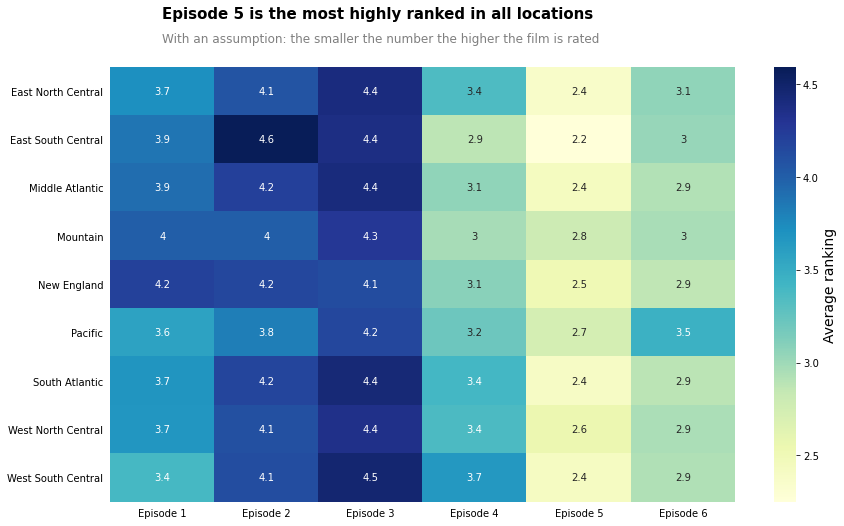

In [47]:
# Rename columns
new_names = ['Episode {}'.format(i) for i in range(1,7)]
old_names = ['prefer_{}'.format(i) for i in range(1,7)]
star_wars.rename(columns = dict(zip(old_names,new_names)),inplace=True) 

# Calculate rankings by location
location_rankings = star_wars.groupby('location').mean().iloc[:,9:15]


# Create a heatmap to graphically represent the results 
plt.figure(figsize=(14,8))
ax = sns.heatmap(location_rankings, cmap='YlGnBu', annot=True, cbar_kws={'label': 'Average ranking'})
ax.figure.axes[-1].yaxis.label.set_size(14)
# Remove y-tick
ax.tick_params(left = False)
ax.tick_params(bottom = False)
# add title
ax.text(0.5,-1,'Episode 5 is the most highly ranked in all locations',size = 15, weight ='bold') 
# add subtitle
ax.text(0.5,-0.5,'With an assumption: the smaller the number the higher the film is rated',size = 12, color = 'grey') 
plt.ylabel('')

## Conclusion

In this project, we have done some tasks to clean Star Wars survey merge 2 lines in 1 to create a header, such as transforming data type from string to numeric. We also faced with missing data in 2 different ways to avoid dropping our data as much as possible. Restructuring dataframe was explored to analyze and visualize our results. And finally, these are some of our observations:
* The popularity of Star Wars is significant, the number of respondents have seen at least 1 episode is more than three times that who have never seen Star Wars.
* Men are more interested in Star Wars than women. However, they share the same pattern of episode rating, where episode 5 is of the most like and episode 3 is the least.
* `Star Wars: Episode V The Empire Strikes Back` is a  “The Empire Strikes Back” is clearly the best of the bunch while episode 3 Star Wars: Episode III Revenge of the Sith received the worst ranking as well as the smallest number of audiences.
* The Star Wars film franchise has more fans than The Star Trek franchise in both genders.
* Luke Skywalker made the greatest impression on the audience and Padme Amidala made the least. However, Han Solo, Obi Wan Kenobi and Yoda are top 3 mostly favorite characters.
* From the data, I also identified some characteristics of Star Wars audiences: The most loyal customers are of the age of 30-44, followed by 18-29 and 45-60. These are people who watched 5-6 episodes of Star Wars in total, with houshold income in the range of `$ 50,000 - $ 99,999`, usually have finished high school and started their professional education. The 3 biggest markets of Star Wars include Pacific, East North Central and South Atlantic.